# Linear regression


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load, explore, pre-process Data

https://www.kaggle.com/swathiachath/kc-housesales-data

In [41]:
housesale_df = pd.read_csv('datasets/kc_house_data.csv')

In [42]:
housesale_df.shape

(21597, 21)

In [43]:
housesale_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [44]:
housesale_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [45]:
housesale_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [46]:
housesale_df = housesale_df.drop({'id', 'date', 'zipcode'}, axis = 1)

housesale_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [47]:
housesale_df['age'] = 2018 - housesale_df['yr_built']

housesale_df = housesale_df.drop('yr_built', axis = 1)

housesale_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,47.5112,-122.257,1340,5650,63
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,47.7210,-122.319,1690,7639,67
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,47.7379,-122.233,2720,8062,85
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,47.5208,-122.393,1360,5000,53
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,47.6168,-122.045,1800,7503,31


In [48]:
housesale_df['renovated'] = housesale_df['yr_renovated'].apply(lambda x:1 if x > 0 else 0)

housesale_df = housesale_df.drop('yr_renovated', axis = 1)
housesale_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,63,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,67,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,85,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,53,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,31,0


In [49]:
housesale_df.to_csv('datasets/housesale.csv', index=False)

In [50]:
housesale_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age,renovated
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,47.560093,-122.213982,1986.620318,12758.283512,47.000324,0.042321
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,0.138552,0.140724,685.230472,27274.441950,29.375234,0.201324
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,3.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,21.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,43.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.000000,67.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000,118.000000,1.000000


Text(0, 0.5, 'Number of bathrooms/bedrooms')

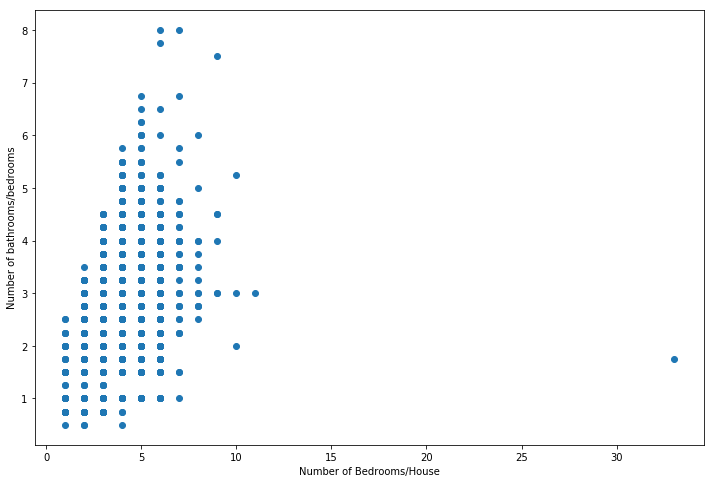

In [51]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(housesale_df['bedrooms'], housesale_df['bathrooms'])

plt.xlabel('Number of Bedrooms/House')
plt.ylabel('Number of bathrooms/bedrooms')

Text(0, 0.5, 'How good the condition is ')

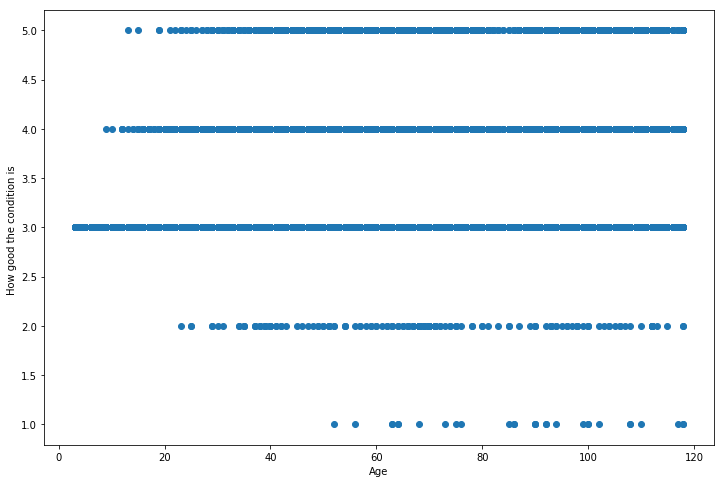

In [52]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(housesale_df['age'], housesale_df['condition'])

plt.xlabel('Age')
plt.ylabel('How good the condition is ')

Text(0, 0.5, 'Overall grade given to the housing unit, based on King County grading system.')

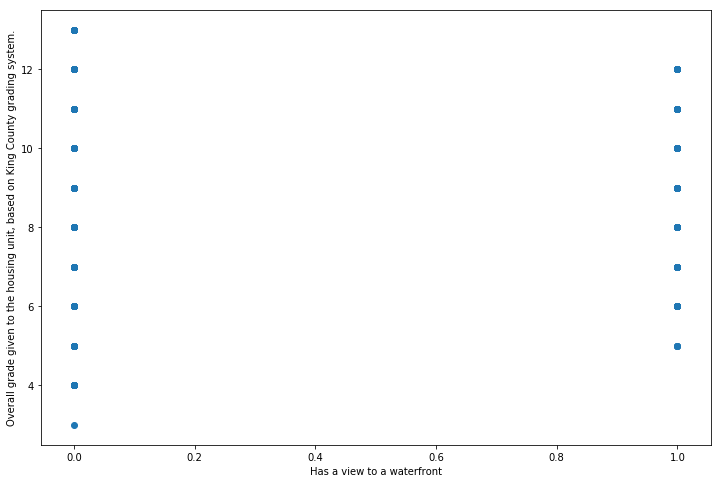

In [53]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(housesale_df['waterfront'], housesale_df['grade'])

plt.xlabel('Has a view to a waterfront')
plt.ylabel('Overall grade given to the housing unit, based on King County grading system.')

Text(0, 0.5, 'price')

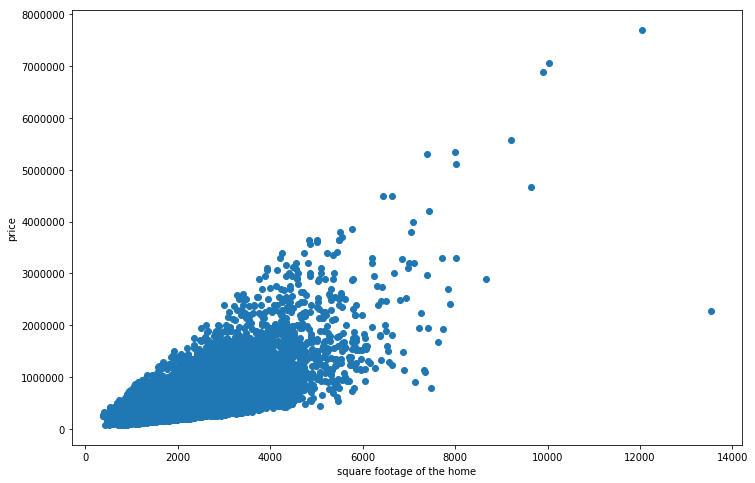

In [54]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(housesale_df['sqft_living'], housesale_df['price'])

plt.xlabel('square footage of the home')
plt.ylabel('price')

Text(0, 0.5, 'price')

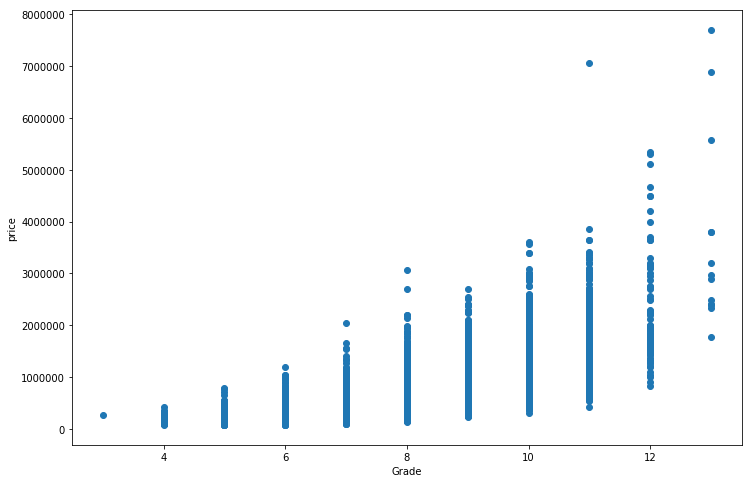

In [55]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(housesale_df['grade'], housesale_df['price'])

plt.xlabel('Grade')
plt.ylabel('price')

In [56]:
housesale_corr = housesale_df.corr()

housesale_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age,renovated
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.306692,0.022036,0.585241,0.082845,-0.053953,0.126082
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,-0.009951,0.132054,0.393406,0.030690,-0.155670,0.018100
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.024280,0.224903,0.569884,0.088303,-0.507173,0.050064
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.052155,0.241214,0.756402,0.184342,-0.318152,0.055039
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,-0.085514,0.230227,0.144763,0.718204,-0.052946,0.007788
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.049239,0.125943,0.280102,-0.010722,-0.489193,0.006348
waterfront,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.014306,-0.041904,0.086507,0.030781,0.026153,0.093282
view,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,0.005871,-0.078107,0.280681,0.072904,0.053636,0.104095
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.015102,-0.105877,-0.093072,-0.003126,0.361592,-0.060309
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.113575,0.200341,0.713867,0.120981,-0.447865,0.013854


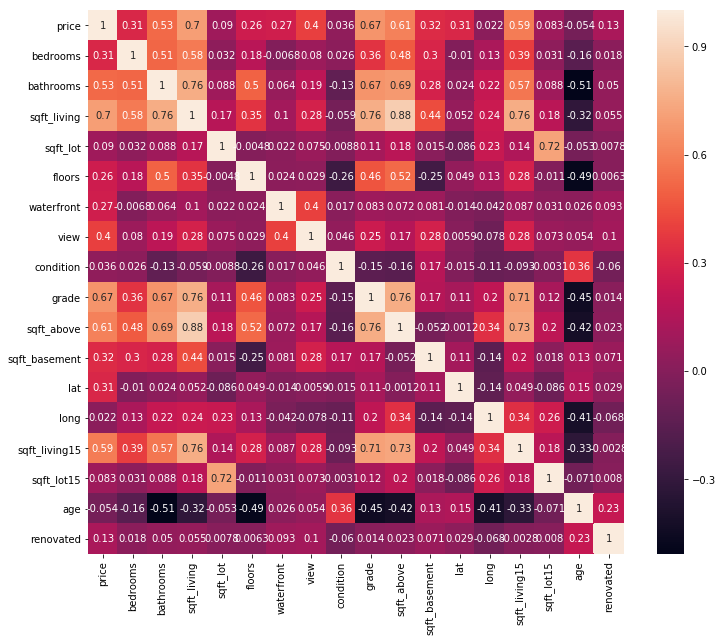

In [57]:
fig, ax = plt.subplots(figsize = (12, 10))

sns.heatmap(housesale_corr, annot=True)

In [58]:
from sklearn.model_selection import train_test_split

X = housesale_df.drop('price', axis=1)
Y = housesale_df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [60]:
x_train.shape, y_train.shape

((17277, 17), (17277,))

In [61]:
x_test.shape, y_test.shape

((4320, 17), (4320,))

### Build Linear Regression Model

* Ordinary least squares Linear Regression.
* fit: Fit linear model.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [62]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression().fit(x_train, y_train)

In [63]:
print('Training score: ', reg_model.score(x_train, y_train))

Training score:  0.7012161329568461


### Evaluate Model
* coef_ : Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.
* R^2 (coefficient of determination) regression score function. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.



In [64]:
predictors = x_train.columns
coef = pd.Series(reg_model.coef_, predictors).sort_values()

print(coef)

long            -118308.928494
bedrooms         -35010.947987
floors            -1567.873287
sqft_lot15           -0.398089
sqft_lot              0.114197
sqft_living15        21.805687
sqft_basement        38.993851
sqft_above           72.670115
sqft_living         111.663967
age                2539.701384
condition         29205.914283
renovated         42655.080834
bathrooms         44773.986789
view              48937.679872
grade             99784.166501
lat              566555.725438
waterfront       643639.666766
dtype: float64


In [65]:
y_pred = reg_model.predict(x_test)

In [66]:
from sklearn.metrics import r2_score

print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.6680054632536856


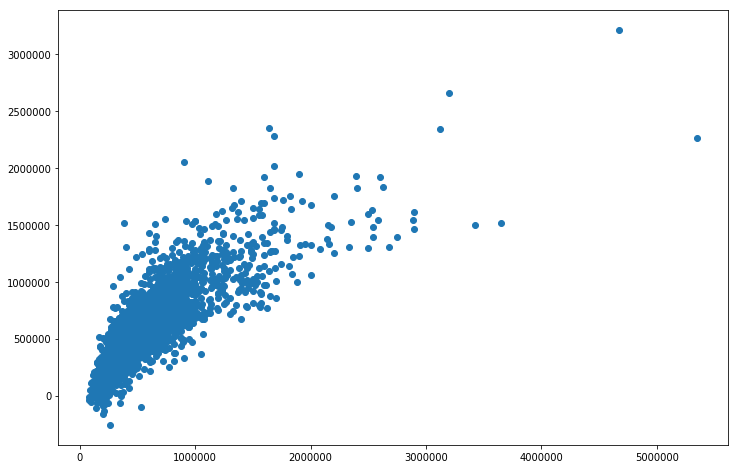

In [67]:
plt.figure(figsize = (12, 8))

plt.scatter(y_test.values, y_pred)

plt.show()

### Regression in Statsmodel

https://www.statsmodels.org/stable/regression.html

In [68]:
import statsmodels.api as sm

x_train_with_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_train_with_const)

In [69]:
result = model.fit()

In [70]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2532.
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:37:12   Log-Likelihood:            -2.3574e+05
No. Observations:               17277   AIC:                         4.715e+05
Df Residuals:                   17260   BIC:                         4.717e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.225e+07   1.72e+06    -24.539

In [71]:
x_test_with_const = sm.add_constant(x_test)

y_pred = result.predict(x_test_with_const)

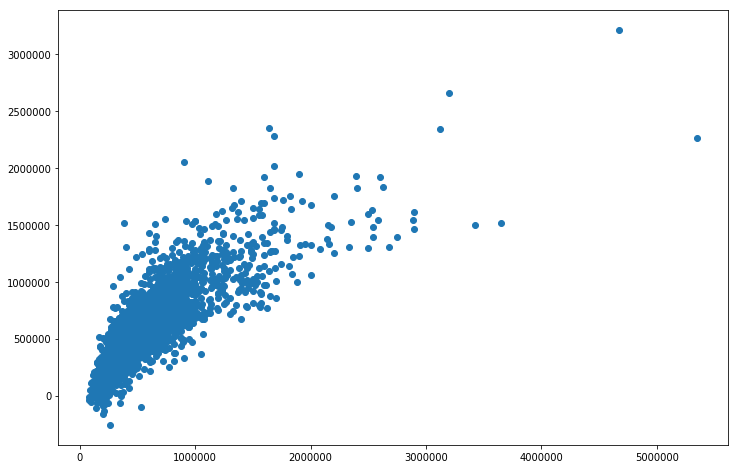

In [72]:
plt.figure(figsize = (12, 8))

plt.scatter(y_test.values, y_pred)

plt.show()